In [9]:
import pandas as pd
import numpy as np
from IPython.display import Image
from helpfunction import train_test_split_custom, hyperparameter_tuning, plot_confusion_matrix, compute_confusion_matrix, export_tree_to_graphviz, compute_metrics
from decisionclassifier import DecisionTree
from randomforestclassifier import RandomForest

In [2]:
data = pd.read_csv('C:/Users/Fabio/Desktop/MushroomDataset/secondary_data.csv', delimiter=';')

data.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [3]:
data = data.loc[:, data.isnull().sum() <= len(data) * 0.70]

In [4]:
X = data.drop('class', axis=1)
y = data['class']

y = y.map({'p': 1, 'e': 0}).values

X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_state=42)

In [5]:
modes = X_train.mode().iloc[0]

X_train = X_train.fillna(modes)

X_test = X_test.fillna(modes)

print(X_train.isnull().sum())
print(X_test.isnull().sum())

assert X_train.isnull().sum().sum() == 0, "There are still missing values in X_train."
assert X_test.isnull().sum().sum() == 0, "There are still missing values in X_test."

assert len(X_train) == len(y_train), "Mismatch in number of samples between X_train and y_train."
assert len(X_test) == len(y_test), "Mismatch in number of samples between X_test and y_test."

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64


In [6]:
param_grid_tree = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy'],
    'max_features': [None]
}

best_params_tree = hyperparameter_tuning(DecisionTree, X_train, y_train, param_grid_tree, cv=3)

tree = DecisionTree(**best_params_tree)
tree.fit(X_train, y_train)

# Evaluate Decision Tree model
train_predictions_tree = tree.predict(X_train)
train_accuracy_tree = np.mean(train_predictions_tree == y_train)
train_error_tree = 1 - train_accuracy_tree

test_predictions_tree = tree.predict(X_test)
test_accuracy_tree = np.mean(test_predictions_tree == y_test)
test_error_tree = 1 - test_accuracy_tree

print(f"\nDecision Tree Training Error: {train_error_tree}")
print(f"Decision Tree Test Error: {test_error_tree}")
print(f"\nDecision Tree Train accuracy: {train_accuracy_tree}")
print(f"Decision Tree Test accuracy: {test_accuracy_tree}")



Best Parameters:
{'max_depth': None, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': None}
Best Cross-Validation Score: 0.9976870330570055

Decision Tree Training Error: 0.0
Decision Tree Test Error: 0.0017193384640575848

Decision Tree Train accuracy: 1.0
Decision Tree Test accuracy: 0.9982806615359424


In [7]:
param_grid_forest = {
    'n_estimators': [10,30],
    'max_depth': [None, 5],
    'min_samples_split': [2],
    'criterion': ['gini'],
    'max_features': [int(np.sqrt(X_train.shape[1]))]
}

best_params_forest = hyperparameter_tuning(RandomForest, X_train, y_train, param_grid_forest, cv=3)

forest = RandomForest(**best_params_forest)
forest.fit(X_train, y_train)

# Evaluate Random Forest model
train_predictions_forest = forest.predict(X_train)
train_accuracy_forest = np.mean(train_predictions_forest == y_train)
train_error_forest = 1 - train_accuracy_forest

test_predictions_forest = forest.predict(X_test)
test_accuracy_forest = np.mean(test_predictions_forest == y_test)
test_error_forest = 1 - test_accuracy_forest

print(f"OOB Score: {forest.oob_score_}")
print(f"\nRandom Forest Training Error: {train_error_forest}")
print(f"Random Forest Test Error: {test_error_forest}")
print(f"\nRandom Forest Train accuracy: {train_accuracy_forest}")
print(f"Random Forest Test accuracy: {test_accuracy_forest}")


Best Parameters:
{'n_estimators': 30, 'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini', 'max_features': 4}
Best Cross-Validation Score: 0.9998771875959472
OOB Score: 0.9996520315218503

Random Forest Training Error: 2.046873400884941e-05
Random Forest Test Error: 0.0

Random Forest Train accuracy: 0.9999795312659912
Random Forest Test accuracy: 1.0


Decision Tree Precision: 0.9983878059504617 Decision Tree Recall: 0.9985341542069774 Decision Tree F1 Score: 0.9984609747160131
Random Forest Precision: 1.0 Random Forest Recall: 1.0 Random Forest F1 Score: 1.0


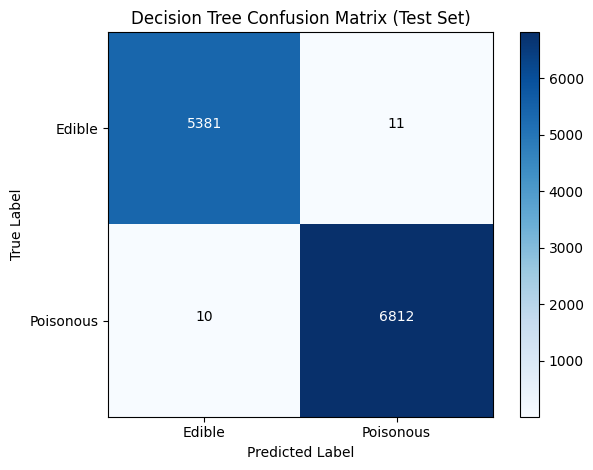

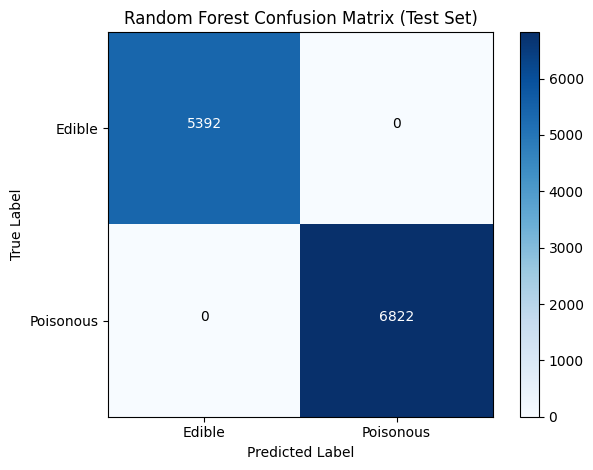

In [11]:
cm_tree_test = compute_confusion_matrix(y_test, test_predictions_tree)
cm_forest_test = compute_confusion_matrix(y_test, test_predictions_forest)
precision,recall,f1score = compute_metrics(y_test, test_predictions_tree)
precisionRF,recallRF,f1scoreRF = compute_metrics(y_test, test_predictions_forest)
class_names = ['Edible', 'Poisonous']

print(f"Decision Tree Precision: {precision}", f"Decision Tree Recall: {recall}", f"Decision Tree F1 Score: {f1score}")
print(f"Random Forest Precision: {precisionRF}", f"Random Forest Recall: {recallRF}", f"Random Forest F1 Score: {f1scoreRF}")

plot_confusion_matrix(cm_tree_test, classes=class_names, title='Decision Tree Confusion Matrix (Test Set)')

plot_confusion_matrix(cm_forest_test, classes=class_names, title='Random Forest Confusion Matrix (Test Set)')

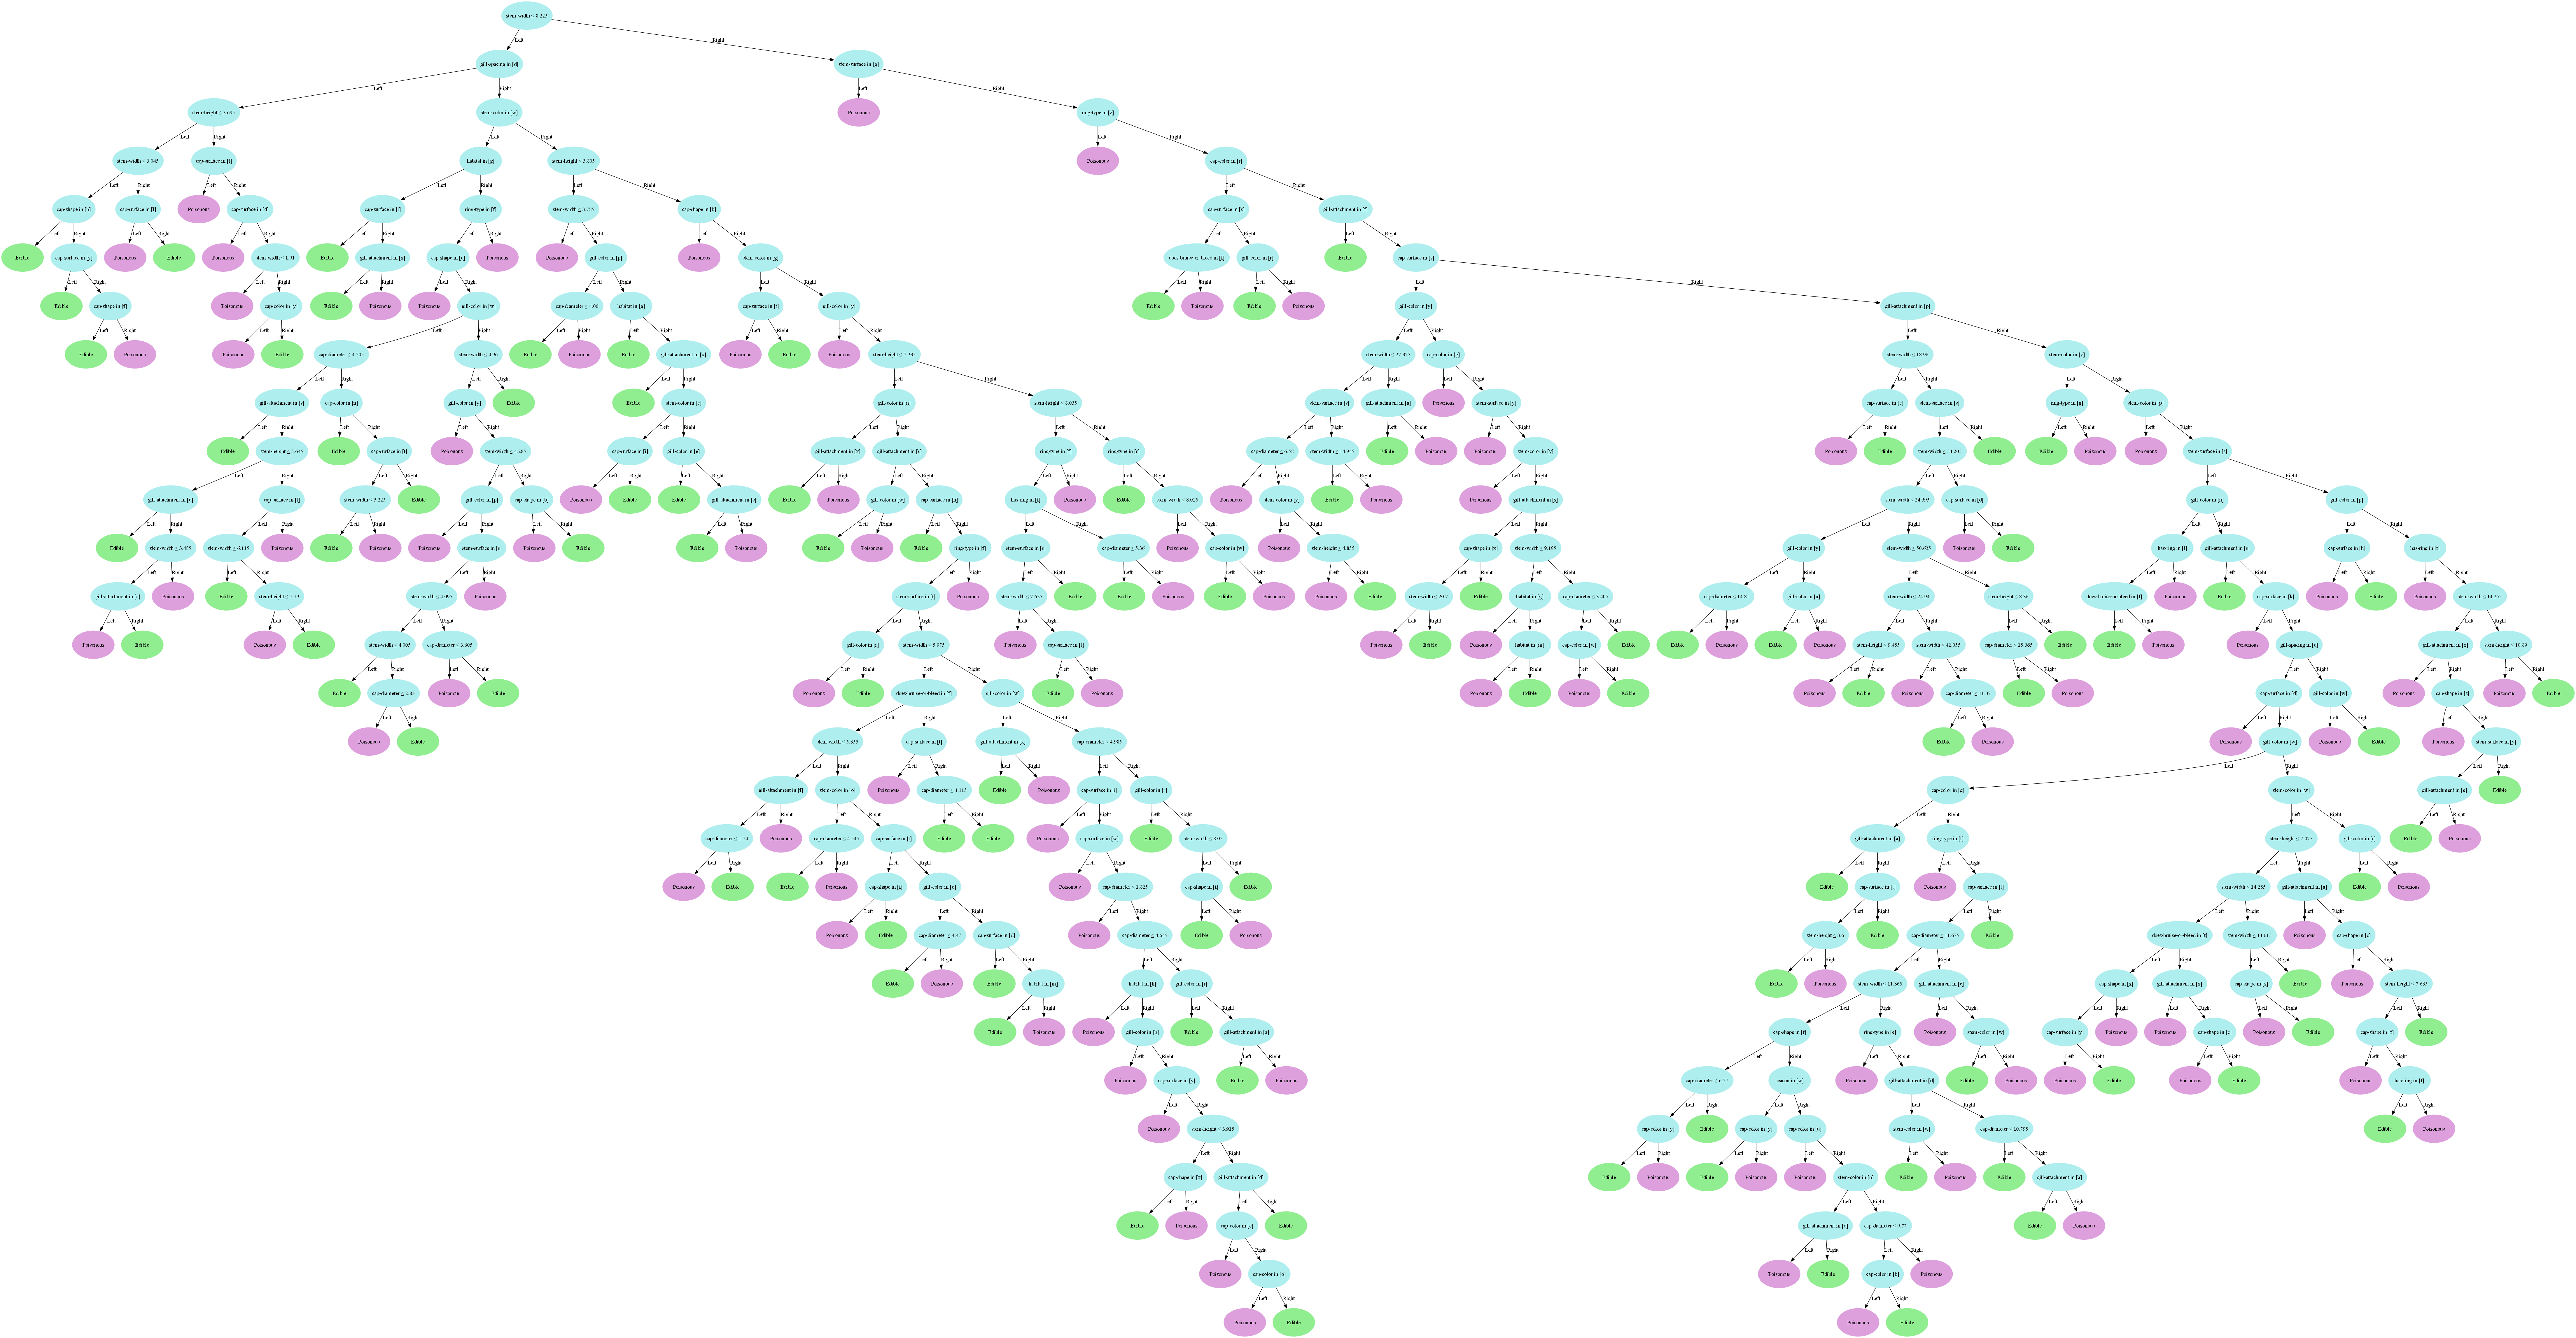

In [18]:
graph = export_tree_to_graphviz(tree.root)

graph.write_png('decision_tree.png')

Image(graph.create_png())